In [7]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.colors as mcolors

In [11]:
df_metricas= pd.read_parquet('data/overall_metrics.parquet')
georefe= pd.read_parquet('data/prec_monthly_obs_sat.parquet')[['latitud','longitud','station']].drop_duplicates(keep='first').reset_index(drop=True)

In [13]:
df_metricas=georefe.merge(df_metricas, on='station', how='inner')
df_metricas

,latitud,longitud,station,clasificacion,departamento,municipio,r2,r2_ajustado,rmse,mae,std,kge,spearman,bias,mape,maape,source
0,2.69814,-75.29815,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,A,HUILA,CAMPOALEGRE,0.001535,-0.089235,648.273641,476.130769,629.298960,0.138778,0.390110,-155.696924,45.456140,0.387893,agera5
1,2.69814,-75.29815,FEDEARROZ_CAMPOALEGRE_ALTAGRACIA,A,HUILA,CAMPOALEGRE,0.065542,-0.019409,627.150655,455.459175,607.499815,0.362725,0.582418,155.762379,45.807979,0.387382,chirps
2,2.88457,-75.44166,FEDEARROZ_PALERMO_ASOJUNCAL,B,HUILA,PALERMO,0.393468,0.332814,407.652418,368.888333,403.588203,0.502848,0.615385,57.420000,50.824213,0.438237,agera5
3,2.88457,-75.44166,FEDEARROZ_PALERMO_ASOJUNCAL,B,HUILA,PALERMO,-0.010746,-0.111821,526.240317,466.898017,405.187942,0.484031,0.650350,335.785055,65.293692,0.532898,chirps
4,3.08083,-75.19083,FEDEARROZ_TELLO_SAN_DIEGO,B,HUILA,TELLO,-6.966110,-8.559332,1165.429512,992.177146,611.400406,-0.571204,-0.035714,992.177146,207.759723,0.831975,agera5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,10.48792,-73.18527,FEDEARROZ_VALLEDUPAR_LA_ESPERANZA,F,CESAR,VALLEDUPAR,0.346223,0.286788,303.075852,221.012876,268.406026,0.665118,0.730769,140.759289,45.425327,0.372449,chirps
88,10.62164,-74.26311,FEDEARROZ_EL_RETEN_EL_VOLGA,D,MAGDALENA,EL RETEN,-4.972762,-5.515741,978.325059,891.896922,402.044526,-0.381605,0.714286,891.896922,253.435863,0.918972,agera5
89,10.62164,-74.26311,FEDEARROZ_EL_RETEN_EL_VOLGA,D,MAGDALENA,EL RETEN,0.585727,0.548066,257.655082,215.566697,214.871257,0.732125,0.730769,142.184682,59.869735,0.371076,chirps
90,10.87405,-72.85299,FEDEARROZ_FONSECA_GRANJA_ITA,B,GUAJIRA,FONSECA,-3.601217,-4.258534,587.111793,529.150001,254.362995,0.112481,0.633333,529.150001,110.166088,0.694818,agera5


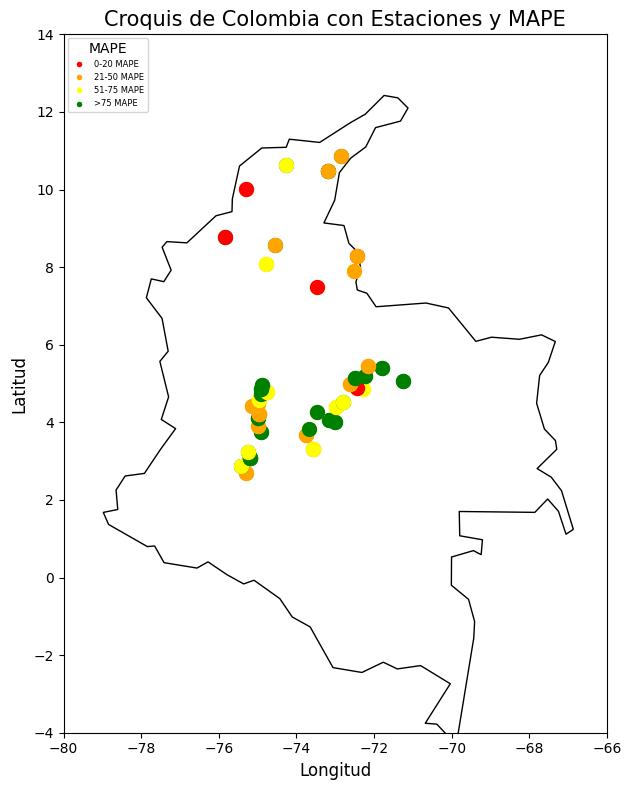

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors

# Cargar el shapefile de Colombia
shapefile_path = 'maps/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Filtrar para obtener solo Colombia
colombia = world[world['SOV_A3'] == 'COL']

# Definir la función para pintar el croquis con los puntos de estaciones y el color de acuerdo a mape
def plot_stations(df):
    # Crear el mapa de Colombia
    fig, ax = plt.subplots(figsize=(8, 8))
    # Poner el fondo de Colombia en blanco
    colombia.plot(ax=ax, edgecolor='black', facecolor='white')

    # Definir los colores según el valor de MAPE
    def get_color(mape):
        if mape <= 20:
            return 'red'
        elif 21 <= mape <= 50:
            return 'orange'
        elif 51 <= mape <= 75:
            return 'yellow'
        else:
            return 'green'

    # Dibujar los puntos de las estaciones con el color correspondiente
    for _, row in df.iterrows():
        ax.plot(row['longitud'], row['latitud'], marker='o', markersize=10, color=get_color(row['mape']), label=row['station'])

    # Ajustar límites y aspecto del mapa
    ax.set_xlim([-80, -66])
    ax.set_ylim([-4, 14])
    ax.set_aspect('equal')
    
    # Crear la leyenda
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='0-20 MAPE', markerfacecolor='red', markersize=5),
        plt.Line2D([0], [0], marker='o', color='w', label='21-50 MAPE', markerfacecolor='orange', markersize=5),
        plt.Line2D([0], [0], marker='o', color='w', label='51-75 MAPE', markerfacecolor='yellow', markersize=5),
        plt.Line2D([0], [0], marker='o', color='w', label='>75 MAPE', markerfacecolor='green', markersize=5)
    ]
    
    ax.legend(handles=legend_elements, title="MAPE", loc='upper left', fontsize=6)

    # Título y etiquetas
    plt.title('Croquis de Colombia con Estaciones y MAPE', fontsize=15)
    plt.xlabel('Longitud', fontsize=12)
    plt.ylabel('Latitud', fontsize=12)

    # Mostrar el mapa
    plt.tight_layout()
    plt.show()

# Llamar la función con el dataframe df_metricas
plot_stations(df_metricas)


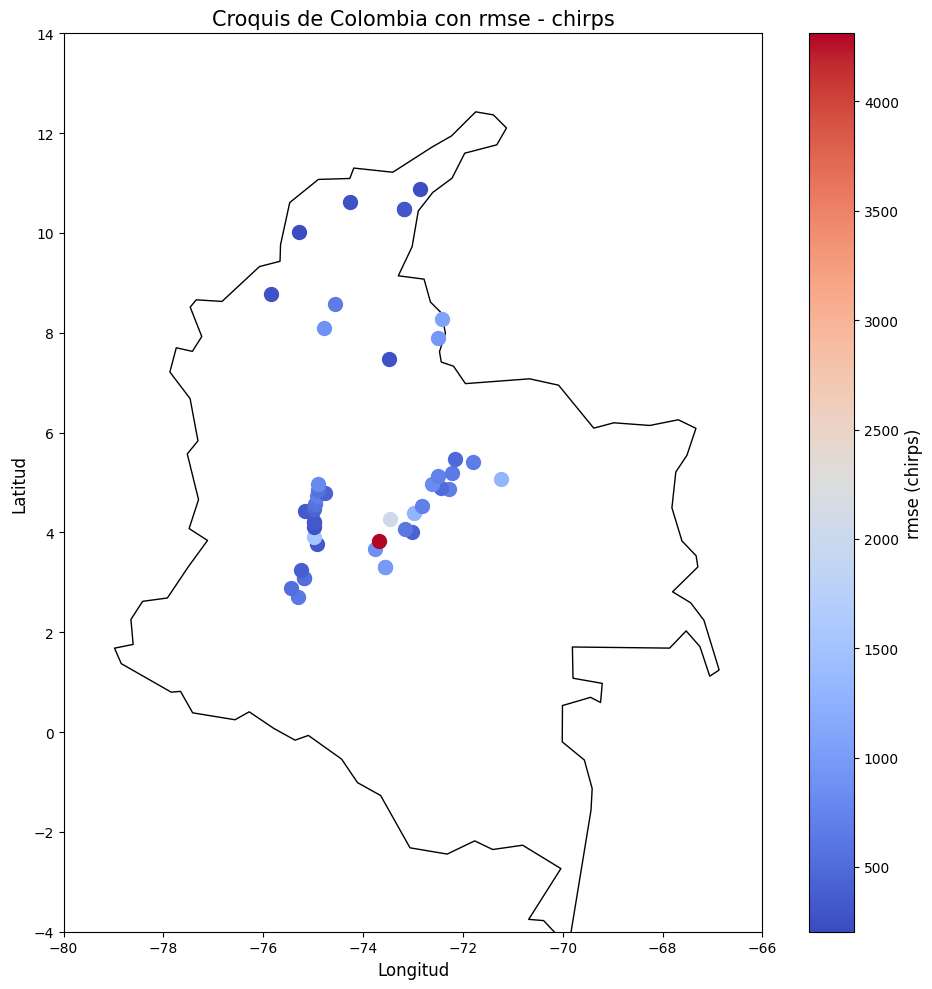

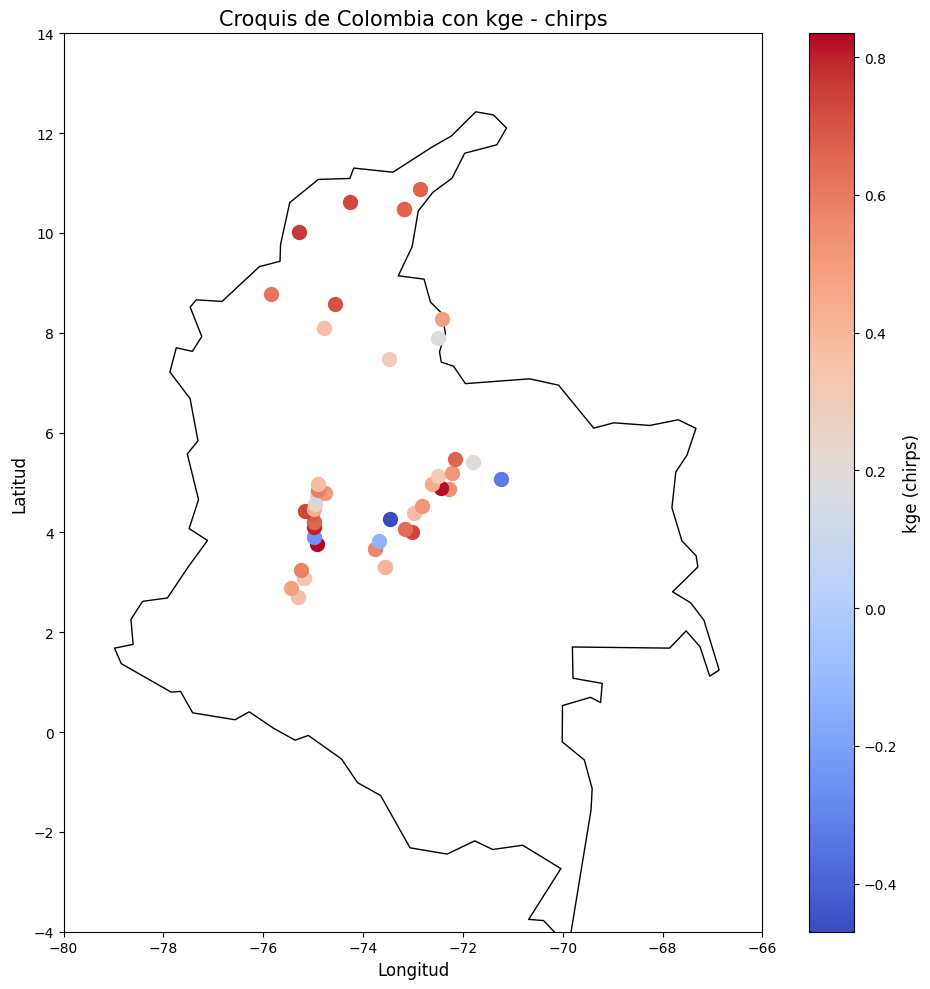

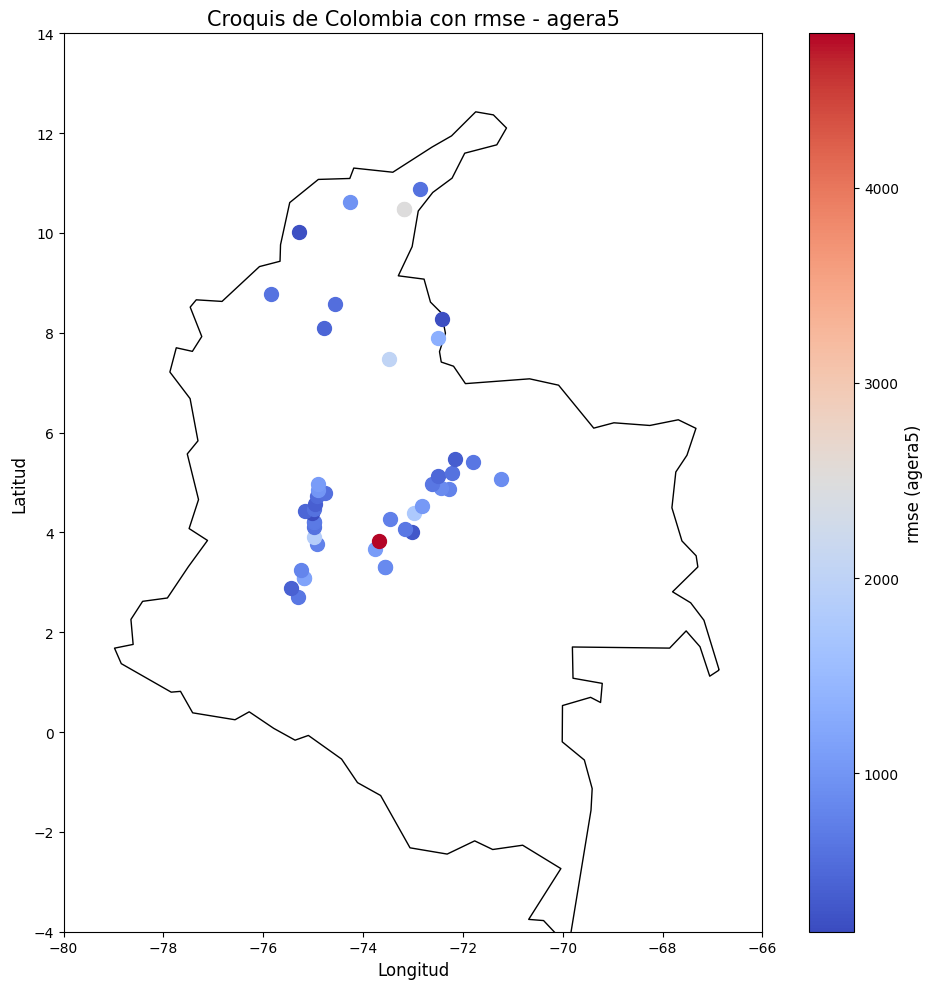

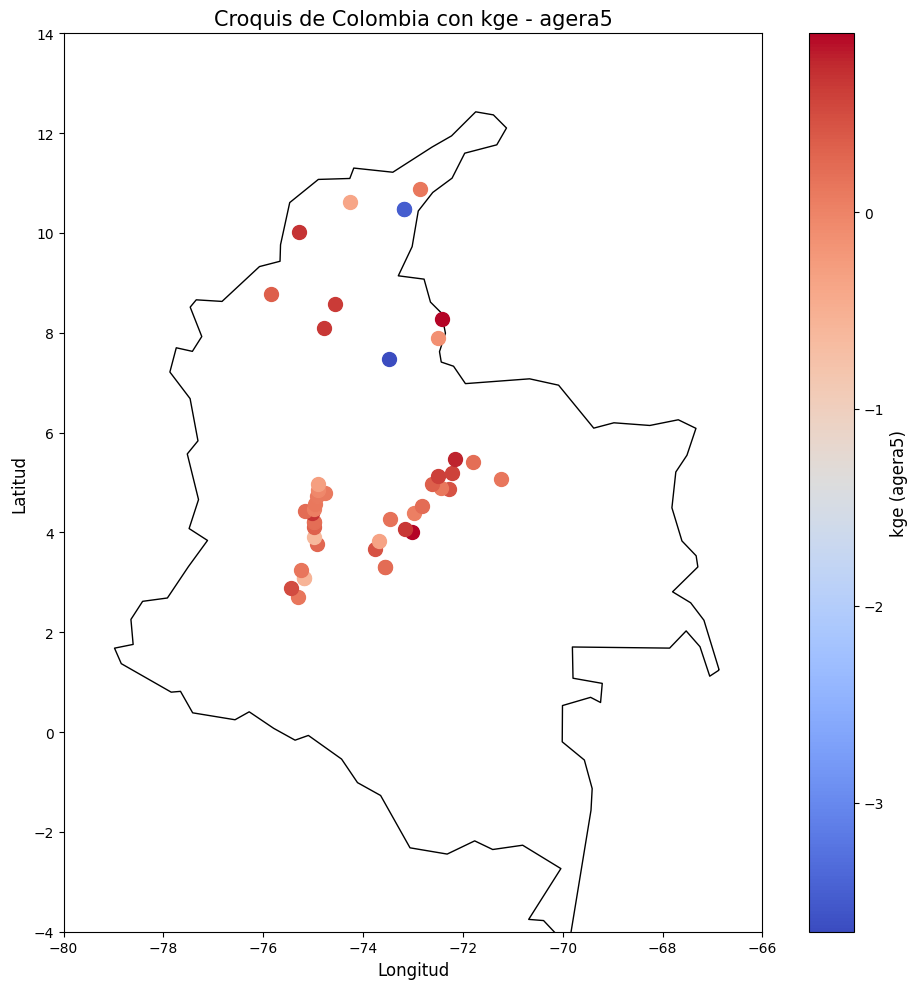

In [16]:
shapefile_path = 'maps/ne_110m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Filtrar para obtener solo Colombia
colombia = world[world['SOV_A3'] == 'COL']

def plot_stations(df, source, metric, cmap_name='viridis'):
    df_source = df[df['source'] == source]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    colombia.plot(ax=ax, edgecolor='black', facecolor='white')

    norm = plt.Normalize(vmin=df_source[metric].min(), vmax=df_source[metric].max())
    cmap = plt.get_cmap(cmap_name)

    for _, row in df_source.iterrows():
        ax.plot(row['longitud'], row['latitud'], marker='o', markersize=10,
                color=cmap(norm(row[metric])), label=row['station'])

    # Crear barra de colores
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # solo para que se vea bien
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label(f'{metric} ({source})', fontsize=12)


    ax.set_xlim([-80, -66])
    ax.set_ylim([-4, 14])
    ax.set_aspect('equal')
    

    plt.title(f'Croquis de Colombia con {metric} - {source}', fontsize=15)
    plt.xlabel('Longitud', fontsize=12)
    plt.ylabel('Latitud', fontsize=12)


    plt.tight_layout()
    plt.show()

# Métricas a graficar
metrics = [ 'rmse', 'kge']
sources = ['chirps', 'agera5']


for source in sources:
    for metric in metrics:
        cmap_name = 'coolwarm' if metric in [ 'rmse', 'kge'] else 'viridis'
        plot_stations(df_metricas, source, metric, cmap_name)
